# MAZ Diplomarbeit - Biodiversität in der Schweiz#

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("01_source/tabula_ch/tabula_saeugetiere.csv")

In [3]:
df.head()

,ORDER,Scientific name,deutscher Name,CAT
0,Mammalia,Bos primigenius,"Ur, Auerochse († 1627, Polen)",EX
1,Mammalia,Ursus arctos,"Braunbär († 1904, Engadin)",RE
2,Mammalia,Alces alces,"Elch († Mittelalter, CH)",RE
3,Mammalia,Lutra lutra,"Fischotter († 1989, Neuenburgersee)",RE
4,Mammalia,Cricetus cricetus,"Hamster († ?, CH)",RE


In [4]:
len (df)

64

In [5]:
df.rename(columns={"ORDER":"order","Scientific name":"sc name","deutscher Name":"dt name","CAT":"cat"},inplace=True)

In [6]:
df.head(1)

,order,sc name,dt name,cat
0,Mammalia,Bos primigenius,"Ur, Auerochse († 1627, Polen)",EX


In [7]:
df['einteilung'] = 'Säugetiere'
df['untergruppe'] = 'Säugetiere'

In [8]:
df.head()

,order,sc name,dt name,cat,einteilung,untergruppe
0,Mammalia,Bos primigenius,"Ur, Auerochse († 1627, Polen)",EX,Säugetiere,Säugetiere
1,Mammalia,Ursus arctos,"Braunbär († 1904, Engadin)",RE,Säugetiere,Säugetiere
2,Mammalia,Alces alces,"Elch († Mittelalter, CH)",RE,Säugetiere,Säugetiere
3,Mammalia,Lutra lutra,"Fischotter († 1989, Neuenburgersee)",RE,Säugetiere,Säugetiere
4,Mammalia,Cricetus cricetus,"Hamster († ?, CH)",RE,Säugetiere,Säugetiere


In [9]:
df["cat"].value_counts()

LC    37
VU    10
RE     8
NT     4
EN     2
CR     2
EX     1
Name: cat, dtype: int64

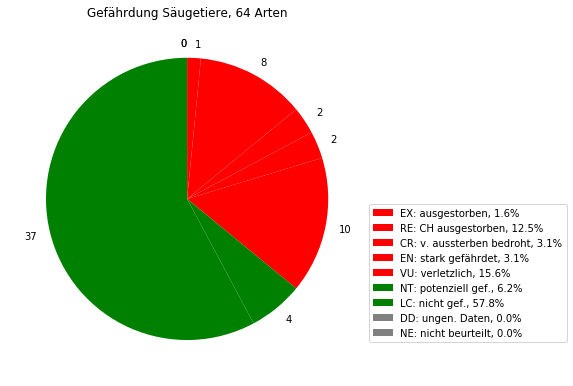

In [10]:
values = [1, 8, 2, 2, 10, 4, 37, 0, 0]
colors = ['r', 'r', 'r', 'r', 'r', 'g', "g", "grey", "grey"]
labels = [
    'EX: ausgestorben', 'RE: CH ausgestorben',
    'CR: v. aussterben bedroht', 'EN: stark gefährdet', 
    'VU: verletzlich',"NT: potenziell gef.",
    "LC: nicht gef.","DD: ungen. Daten","NE: nicht beurteilt"]


fig1, ax1 = plt.subplots(figsize=(7, 6))
fig1.subplots_adjust(0.3,0,1,1)
plt.pie(values, colors=colors, labels= values, counterclock=False,startangle=90)
plt.title('Gefährdung Säugetiere, 64 Arten')

total = sum(values)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, values)],
    
    bbox_to_anchor=(1.0, 0.5),
    bbox_transform=fig1.transFigure
)
plt.show()